In [1]:
from pycaret.regression import *

In [2]:
df_train=pd.read_csv('train.csv', index_col='Id')
df_test=pd.read_csv('test.csv', index_col='Id')
submission=pd.read_csv('sample_submission.csv', index_col='Id')
data=df_train
print(df_train.shape, df_test.shape, submission.shape)

(1460, 80) (1459, 79) (1459, 1)


In [3]:
reg = setup(df_train, target='SalePrice', train_size=0.8)

,Description,Value
0,session_id,7350
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1168, 416)"


In [4]:
best_model = compare_models(sort = 'RMSE')
# 모델 비교의 경우 기본적으로 k-fold cv로 값을 비교하게 된다.(k=10)
# 본 과업에서의 평가지표는 'RMSE'이기 때문에 해당 지표를 기준으로 내림차순을 설정해 비교했다.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16910.9728,815533031.9274,27700.5969,0.8766,0.1373,0.0980,0.1670
lightgbm,Light Gradient Boosting Machine,16956.2215,829104505.5348,28190.6695,0.8730,0.1445,0.1005,0.0400
rf,Random Forest Regressor,18016.5369,972375951.2939,30346.9717,0.8525,0.1555,0.1083,0.2730
omp,Orthogonal Matching Pursuit,18025.5346,1299745079.0346,33665.2123,0.7976,0.1946,0.1064,0.1810
ridge,Ridge Regression,18817.7514,1284727042.7615,33867.1382,0.7979,0.1919,0.1108,0.0250
et,Extra Trees Regressor,20581.5232,1208295037.7028,34036.5932,0.8138,0.1741,0.1221,0.2980
llar,Lasso Least Angle Regression,18271.2354,1333028568.2332,34390.4732,0.7927,0.1858,0.1071,0.2470
lasso,Lasso Regression,19133.2456,1467603708.8135,36000.9061,0.7692,0.2005,0.1122,0.2160
ada,AdaBoost Regressor,24816.2472,1374129754.8393,36665.8799,0.7869,0.2067,0.1633,0.1010
en,Elastic Net,20716.0228,1594923021.7454,37167.3106,0.7510,0.1664,0.1206,0.0500


In [5]:
# 모델 생성(create)
# 위 모델 비교결과를 기준으로 상위 3개의 모델만 생성해 활용을 해본다. 이미 성능 평가 비교를 했기 때문에 cv=False

gbr = create_model('gbr', cross_validation=False)
lightgbm = create_model('lightgbm', cross_validation=False)
rf = create_model('rf', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18702.0337,7.885533e+08,28081.1921,0.8637,0.1502,0.1108


In [6]:
# 하이퍼파라미터 튜닝
# 모델 하이퍼파라미터 튜닝(Tune)

tuned_gbr = tune_model(gbr, optimize='RMSE', n_iter=10)
tuned_lightgbm = tune_model(lightgbm, optimize='RMSE', n_iter=10)
tuned_rf = tune_model(rf, optimize='RMSE', n_iter=10)

'''
모델 튜닝에는 기본적으로 K-Fold CV를 바탕으로 진행되며 최적화는 과업에 맞게 'RMSE"를 선택해 진행했다.
튜닝 방법은 일반적으로 Random Grid를 iter(default=10)만큰 최적화 시킨다.
해당 방법 외 custom grid 파라미터를 추가하여 튜닝을 진행할 수 있다.
'''

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18847.1009,1970917447.5787,44395.0160,0.7551,0.1623,0.0931
1,20974.3110,1033839035.9451,32153.3674,0.8429,0.2136,0.1544
2,18730.5968,992287515.3884,31500.5955,0.8496,0.1596,0.1128
3,14222.4415,364046634.9403,19080.0062,0.9080,0.1332,0.0969
4,18603.6698,884357487.0674,29738.1487,0.8799,0.1575,0.1125
5,21103.7907,2018345983.6561,44926.0056,0.7486,0.1684,0.1143
6,19861.4437,1152515590.5763,33948.7200,0.8453,0.1551,0.1072
7,18529.2376,1228638220.6064,35051.9360,0.7884,0.1808,0.1216
8,15539.1113,470616229.9931,21693.6910,0.9102,0.1214,0.0931


'\n모델 튜닝에는 기본적으로 K-Fold CV를 바탕으로 진행되며 최적화는 과업에 맞게 \'RMSE"를 선택해 진행했다.\n튜닝 방법은 일반적으로 Random Grid를 iter(default=10)만큰 최적화 시킨다.\n해당 방법 외 custom grid 파라미터를 추가하여 튜닝을 진행할 수 있다.\n'

In [7]:
# 블렌딩
# 모델 블렌딩(Blend)

blender_specific = blend_models(estimator_list = [tuned_gbr,tuned_lightgbm,tuned_rf])

'''
튜닝이 끝난 모델 3개를 앙상블(여러개의 결정 트리를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법 - 여러개의 모델을 조화롭게 학습시켜 그 모델들의 예측결과들을 이용한다.) 하는 작업이다.
기본적으로 전체 데이터셋을 사용하며 10-fold, RMSE로 최적화를 시켰다.
오히려 일반 단일 모델에 비해 성능이 낮게 나왔다.
아마 튜닝 하는 과정에서 랜덤 서치다보니 성능이 매우 낮게 튜닝된듯 보인다.
하지만 앙상블 작업을 진행했기 때문에 단일 모델에 비해 일반화 성능은 아마 더 좋을것이다.
'''

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17062.0030,1363652279.2644,36927.6628,0.8306,0.1399,0.0871
1,17278.4104,660469398.1376,25699.5992,0.8996,0.1720,0.1209
2,15855.8205,688507342.9798,26239.4234,0.8957,0.1355,0.0958
3,13050.1943,326234987.6809,18061.9763,0.9176,0.1210,0.0859
4,16252.0963,625652132.6550,25013.0393,0.9150,0.1310,0.0960
5,16615.9911,1498772316.8421,38713.9809,0.8133,0.1473,0.0913
6,18423.7975,930638175.8645,30506.3629,0.8751,0.1456,0.1013
7,15185.9384,993330392.2060,31517.1444,0.8289,0.1559,0.1004
8,14099.2998,381192606.1364,19524.1544,0.9272,0.1063,0.0819


'\n튜닝이 끝난 모델 3개를 앙상블(여러개의 결정 트리를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법\n- 여러개의 모델을 조화롭게 학습시켜 그 모델들의 예측결과들을 이용한다.) 하는 작업이다.\n기본적으로 전체 데이터셋을 사용하며 10-fold, RMSE로 최적화를 시켰다.\n오히려 일반 단일 모델에 비해 성능이 낮게 나왔다.\n아마 튜닝 하는 과정에서 랜덤 서치다보니 성능이 매우 낮게 튜닝된듯 보인다.\n하지만 앙상블 작업을 진행했기 때문에 단일 모델에 비해 일반화 성능은 아마 더 좋을것이다.\n'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


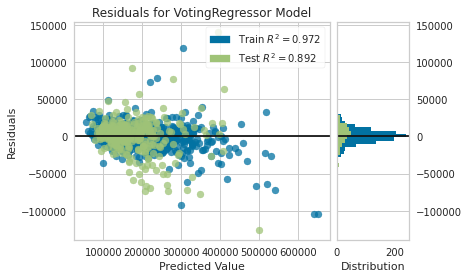

'\ntrain/test 유사분포\ntest set에 비해 train set 설명력이 매우 높은 것으로 보아 과적합을 의심해볼 수 있다.\ntrain/test 모두 아웃라이어 제거가 필요해보인다.\n'

In [8]:
# 시각화
# 모델 시각화(plot)

plot_model(blender_specific)

'''
train/test 유사분포
test set에 비해 train set 설명력이 매우 높은 것으로 보아 과적합을 의심해볼 수 있다.
train/test 모두 아웃라이어 제거가 필요해보인다.
'''

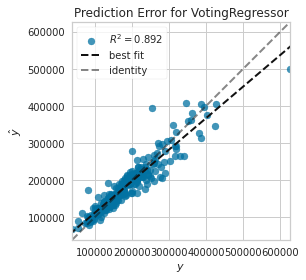

In [9]:
# 모델 시각화(plot)_plot = 'error'

plot_model(blender_specific, plot='error')

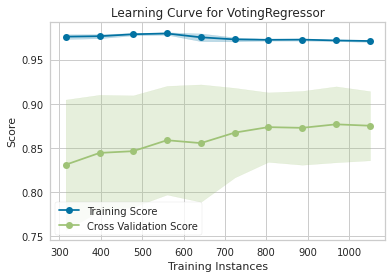

"\ntraining instances 1000회까지 cv가 상승 추세를 보아 어느정도 깊게 학습해도 일반화에 큰 무리가 없어보인다.\nscore = 'AUC' defalut 로 지정되어 있다.\n"

In [10]:
# 모델 시각화(plot)_plot = 'learning'

plot_model(blender_specific, plot='learning')

'''
training instances 1000회까지 cv가 상승 추세를 보아 어느정도 깊게 학습해도 일반화에 큰 무리가 없어보인다.
score = 'AUC' defalut 로 지정되어 있다.
'''

In [11]:
# 학습 및 예측
# 마지막 학습 및 예측(Finalize, Predict)

# 마지막 학습(Finalize)
final_model = finalize_model(blender_specific)

# 예측(Predict)
prediction = predict_model(final_model, data=df_test)


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [12]:
print(prediction['Label'])

Id
1461    130781.600999
1462    165027.444822
1463    183864.786496
1464    188409.016588
1465    186283.535492
            ...      
2915     91546.364920
2916     88460.633543
2917    158248.804860
2918    127838.800755
2919    204873.530468
Name: Label, Length: 1459, dtype: float64


In [13]:
submission['SalePrice'] = prediction['Label']
print(submission[:10])
submission.to_csv('Result_automl_noscaling.csv')
# score - 0.14817 (2,045 / 4,241)

          SalePrice
Id                 
1461  130781.600999
1462  165027.444822
1463  183864.786496
1464  188409.016588
1465  186283.535492
1466  175232.607669
1467  171833.797356
1468  169229.999644
1469  180529.876213
1470  126130.701914
